In [1]:
import numpy as np

import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', -1)
pd.set_option('display.max_info_columns', -1)
pd.set_option('display.max_info_rows', -1)

from scipy.stats import ttest_ind, f_oneway

import graphviz    # http://graphviz.readthedocs.io/en/latest/manual.html
from graphviz import Digraph, Graph

from wordcloud import WordCloud

from IPython.display import Image

import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

if 'galvanize' in plt.style.available:
    plt.style.use('galvanize')
else:
    print 'Forgoing the galvanize matplotlib style...'

#with plt.style.context(('galvanize')): ...  # <-- you can do that to temporarily use a style
#plt.style.reload_library()         # <-- reloads all the themes from disk
#print matplotlib.get_configdir()   # <-- prints the folder where the themes are stored

try:
    from helper import watermark_fig
except:
    def watermark_fig(*args): pass
    print 'Forgoing the galvanize watermark...'

In [2]:
df = pd.read_csv('datamil-world-war-ii-thor-data/THOR_WWII_DATA_CLEAN.csv',
                 parse_dates=['MSNDATE'], infer_datetime_format=True)

/Users/ryan/anaconda/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (14,48,49,51,52,59,60) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
df.head()

,WWII_ID,MASTER_INDEX_NUMBER,MSNDATE,THEATER,NAF,COUNTRY_FLYING_MISSION,TGT_COUNTRY_CODE,TGT_COUNTRY,TGT_LOCATION,TGT_TYPE,TGT_ID,TGT_INDUSTRY_CODE,TGT_INDUSTRY,SOURCE_LATITUDE,SOURCE_LONGITUDE,LATITUDE,LONGITUDE,UNIT_ID,MDS,AIRCRAFT_NAME,MSN_TYPE,TGT_PRIORITY,TGT_PRIORITY_EXPLANATION,AC_ATTACKING,ALTITUDE,ALTITUDE_FEET,NUMBER_OF_HE,TYPE_OF_HE,LBS_HE,TONS_OF_HE,NUMBER_OF_IC,TYPE_OF_IC,LBS_IC,TONS_OF_IC,NUMBER_OF_FRAG,TYPE_OF_FRAG,LBS_FRAG,TONS_OF_FRAG,TOTAL_LBS,TOTAL_TONS,TAKEOFF_BASE,TAKEOFF_COUNTRY,TAKEOFF_LATITUDE,TAKEOFF_LONGITUDE,AC_LOST,AC_DAMAGED,AC_AIRBORNE,AC_DROPPING,TIME_OVER_TARGET,SIGHTING_METHOD_CODE,SIGHTING_EXPLANATION,BDA,CALLSIGN,ROUNDS_AMMO,SPARES_RETURN_AC,WX_FAIL_AC,MECH_FAIL_AC,MISC_FAIL_AC,TARGET_COMMENT,MISSION_COMMENTS,SOURCE,DATABASE_EDIT_COMMENTS
0,1,NaN,1943-08-15,MTO,12 AF,USA,13.0,ITALY,SPADAFORA,NaN,40675.0,650.0,NaN,38.2166667,15.3667,38.220000,15.370000,27 FBG/86 FBG,A36,A36,NaN,NaN,NaN,NaN,NaN,0.0,40.0,500 LB GP (GP-M43/M64),NaN,10.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.0,PONTE OLIVO AIRFIELD,SICILY,37.131022,14.321464,NaN,NaN,20.0,20.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,4285,20028.0,1945-02-20,PTO,5 AF,USA,NaN,PHILIPPINE ISLANDS,PUERTA PRINCESA,UNIDENTIFIED TARGET,NaN,NaN,NaN,945,11845,9.750000,118.750000,89 S,A20,A20,10.0,1,NaN,1.0,1.0,0.0,NaN,250 LB GP (GP-M57),NaN,NaN,NaN,100 LB INCENDIARY,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,NaN,1943-08-15,MTO,12 AF,USA,13.0,ITALY,COSENZA,NaN,9630.0,810.0,NaN,3916N,1615,39.270000,16.250000,27 FBG/86 FBG,A36,A36,NaN,NaN,NaN,NaN,NaN,0.0,36.0,500 LB GP (GP-M43/M64),NaN,9.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.0,PONTE OLIVO AIRFIELD,SICILY,37.131022,14.321464,NaN,NaN,18.0,36.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,NaN,1943-08-15,MTO,12 AF,USA,13.0,ITALY,GIOJA TAURO,NaN,16140.0,631.0,NaN,3826N,1554,38.430000,15.900000,27 FBG/86 FBG,A36,A36,NaN,NaN,NaN,NaN,NaN,0.0,30.0,500 LB GP (GP-M43/M64),NaN,7.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.5,PONTE OLIVO AIRFIELD,SICILY,37.131022,14.321464,NaN,NaN,15.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN
4,8167,14639.0,1945-02-23,PTO,5 AF,USA,NaN,PHILIPPINE ISLANDS,BALETE PASS,WOODED AREA,NaN,NaN,NaN,1605,12055,16.083333,120.916667,113 S,A20,A20,10.0,1,NaN,1.0,1.0,0.0,NaN,250 LB GP (GP-M57),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
df.info(True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178281 entries, 0 to 178280
Data columns (total 62 columns):
WWII_ID                     int64
MASTER_INDEX_NUMBER         float64
MSNDATE                     datetime64[ns]
THEATER                     object
NAF                         object
COUNTRY_FLYING_MISSION      object
TGT_COUNTRY_CODE            float64
TGT_COUNTRY                 object
TGT_LOCATION                object
TGT_TYPE                    object
TGT_ID                      float64
TGT_INDUSTRY_CODE           float64
TGT_INDUSTRY                object
SOURCE_LATITUDE             object
SOURCE_LONGITUDE            object
LATITUDE                    float64
LONGITUDE                   float64
UNIT_ID                     object
MDS                         object
AIRCRAFT_NAME               object
MSN_TYPE                    float64
TGT_PRIORITY                object
TGT_PRIORITY_EXPLANATION    object
AC_ATTACKING                float64
ALTITUDE                    float6

The following is just a dump of my personal notes. Needs cleanup.

 - MSNDATE
     - the date of the mission (is "MSN" an apprev. for "mission"?)
 - THEATER
     - the [Theater of Operation](https://en.wikipedia.org/wiki/United_States_theaters_of_operations_in_World_War_II)
     - each theater is a group of [Allied Nations](https://en.wikipedia.org/wiki/Allies_of_World_War_II)
 - NAF
     - the [Numbered Air Force](https://en.wikipedia.org/wiki/Numbered_Air_Force)
     - e.g. the [Royal Air Force](https://en.wikipedia.org/wiki/Royal_Air_Force) from the UK
     - e.g. the [Twelfth Air Force](https://en.wikipedia.org/wiki/Twelfth_Air_Force) from the US
 - COUNTRY_FLYING_MISSION
     - the name of the country flying the mission (obviously)
 - TGT_COUNTRY
     - _target_ country (pretty sure TGT stands for "target")
 - TGT_LOCATION
     - _target_ location (I think each "location" is the name of a city, but I need to check on that)
 - SOURCE_LATITUDE and SOURCE_LONGITUDE
     - cryptic lat and long; see the fields below for better options
 - LATITUDE and LONGITUDE
     - these seem to be the _parsed_ version of SOURCE_LATITUDE and SOURCE_LONGITUDE, so that's nice. :)
 - UNIT_ID
     - I haven't investigated this yet
 - MDS
     - stands for "Model Design Series". See: [ref](http://www.globalsecurity.org/military/systems/aircraft/mds.htm) and [ref](https://en.wikipedia.org/wiki/United_States_military_aircraft_designation_systems)
     - this seems to be the same as AIRCRAFT_NAME, with some small differences which I don't understand
     - needs more investigation
 - AIRCRAFT_NAME
     - ... the aircraft name... same-ish as MDS above; see above
 - MSN_TYPE
     - no idea yet
 - TGT_PRIORITY and TGT_PRIORITY_EXPLANATION
     - _target_ priority
     - unexplored at the moment
 - AC_ATTACKING
     - no idea yet
 - ALTITUDE and ALTITUDE_FEET
     - altitude, it seems, but mostly missing...
 - NUMBER_OF_HE, TYPE_OF_HE, LBS_HE, TONS_OF_HE
     - HE is a [High-explosive Bomb](https://en.wikipedia.org/wiki/Explosive_material#High_explosives)
     - e.g. https://en.wikipedia.org/wiki/SC250_bomb
     - NUMBER_OF_HE is mostly missing
     - TONS_OF_HE is filled in much more than LBS_HE
     - TONS_OF_HE denotes "tons of TNT" (thanks @sya for pointing this out) (see [this](http://www.nationalmuseum.af.mil/Visit/FactSheets/Display/tabid/509/Article/196220/fat-man-atomic-bomb.aspx))
 - NUMBER_OF_IC, TYPE_OF_IC, LBS_IC, TONS_OF_IC
     - IC is a [Incendiary Bomb](https://en.wikipedia.org/wiki/Incendiary_device#Development_and_use_in_World_War_II)
 - NUMBER_OF_FRAG, TYPE_OF_FRAG, LBS_FRAG, TONS_OF_FRAG
     - FRAG is [Fragmentation Bomb](https://en.wikipedia.org/wiki/Fragmentation_(weaponry))
     - e.g. https://en.wikipedia.org/wiki/M29_cluster_bomb
     - e.g. https://en.wikipedia.org/wiki/Butterfly_Bomb
     - e.g. https://en.wikipedia.org/wiki/Mk_2_grenade
 - TOTAL_LBS and TOTAL_TONS
     - again, there are more missing values in TOTAL_LBS than in TOTAL_TONS
     - again, TOTAL_TONS denotes "tons of TNT"
 - TAKEOFF_BASE, TAKEOFF_COUNTRY, TAKEOFF_LATITUDE, TAKEOFF_LONGITUDE
     - obvious, but unexplored as of yet
 - AC_LOST, AC_DAMAGED, AC_AIRBORNE, AC_DROPPING
     - no idea yet -- what is _AC_? Maybe [Attack Aircraft](https://en.wikipedia.org/wiki/Attack_aircraft)?
 - TIME_OVER_TARGET
     - no idea yet
 - SIGHTING_METHOD_CODE, SIGHTING_EXPLANATION
     - unexplored
 - BDA
     - Maybe [Bomb damage assessment](https://en.wikipedia.org/wiki/Bomb_damage_assessment)?
 - CALLSIGN
     - unexplored
 - ROUNDS_AMMO
     - unexplored
 - SPARES_RETURN_AC, WX_FAIL_AC, MECH_FAIL_AC, MISC_FAIL_AC
     - again, what is _AC_?
     - unexplored
 - TARGET_COMMENT, MISSION_COMMENTS, SOURCE, DATABASE_EDIT_COMMENTS
     - unexplored
 
Yikes... so much to do!

### MSNDATE

In [5]:
df['year_month'] = df['MSNDATE'].map(lambda x: '{}.{:02d}'.format(x.year, x.month))
df['year_quarter'] = df['MSNDATE'].map(lambda x: '{}.q{}'.format(x.year, (x.month+2)/3))
df['year'] = df['MSNDATE'].map(lambda x: '{}'.format(x.year))

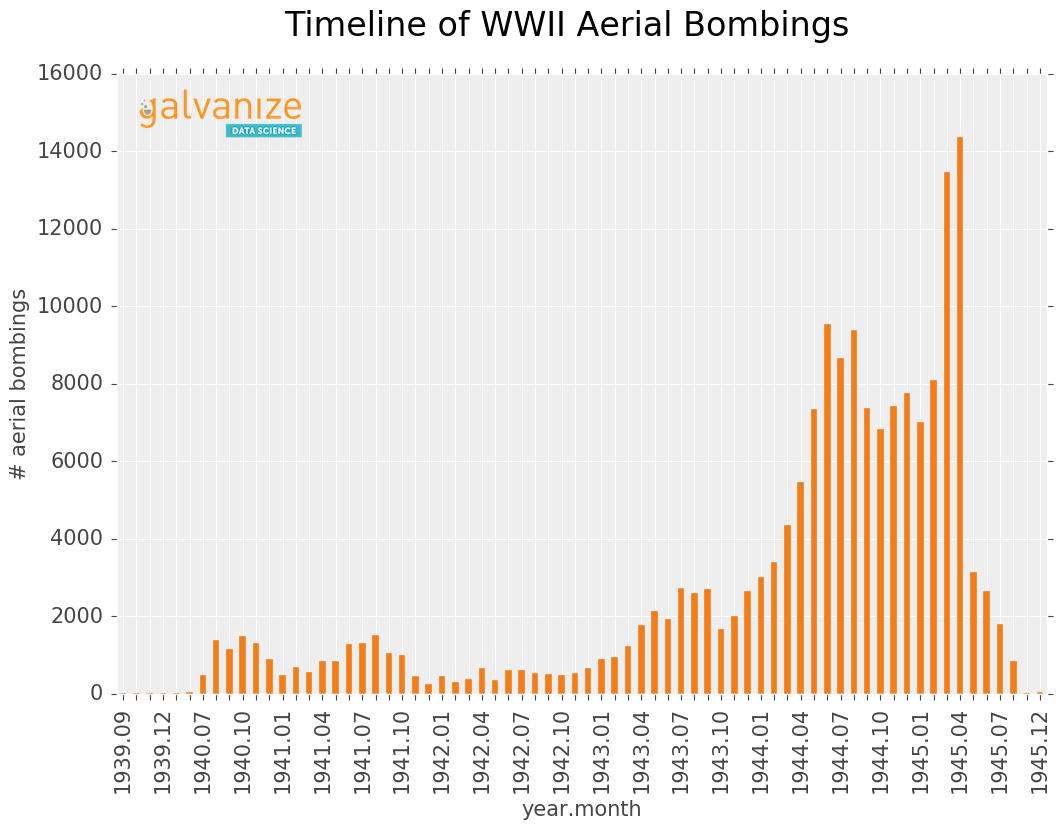

In [6]:
fig, ax = plt.subplots(1, 1)
year_month_mission_counts = df.groupby('year_month').apply(len)
year_month_mission_counts.plot(kind='bar', ax=ax)
ax.set_ylabel('# aerial bombings')
ax.set_xlabel('year.month')
fig.suptitle("Timeline of WWII Aerial Bombings")
for label in ax.get_xticklabels():
    label.set_visible(False)
for label in ax.get_xticklabels()[::3]:
    label.set_visible(True)
watermark_fig(fig, 120, 670)

### THEATER

After some google, I figured out that THEATER means "Theater of Operation". See the wikipedia page: https://en.wikipedia.org/wiki/United_States_theaters_of_operations_in_World_War_II

In [7]:
df['THEATER'].value_counts()

ETO            95827
PTO            36192
MTO            30532
CBI            12404
EAST AFRICA    142  
MADAGASCAR     26   
Name: THEATER, dtype: int64

In [8]:
df['THEATER_FULL_NAME'] = df['THEATER'].map({'ETO': 'European Theater of Operations',
                                             'PTO': 'Pacific Theater of Operations',
                                             'MTO': 'Mediterranean Theater of Operations',
                                             'CBI': 'China Burma India Theater',
                                             'EAST AFRICA': 'Other',
                                             'MADAGASCAR': 'Other'}).fillna('Unknown')
df['THEATER_FULL_NAME'].unique()

array(['Mediterranean Theater of Operations',
       'Pacific Theater of Operations', 'European Theater of Operations',
       'Unknown', 'China Burma India Theater', 'Other'], dtype=object)

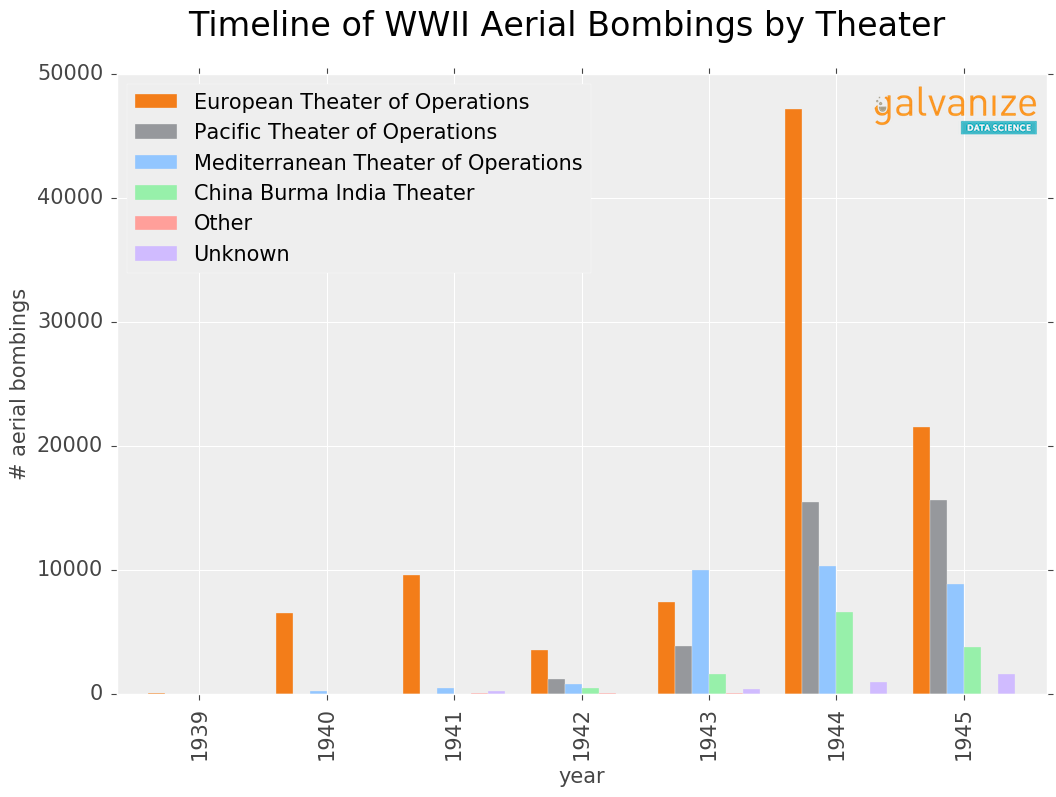

In [9]:
fig, ax = plt.subplots(1, 1)
theater_counts = df.groupby(['year', 'THEATER_FULL_NAME']).apply(len) \
                    .unstack('THEATER_FULL_NAME').fillna(0)
order = ['European Theater of Operations', 'Pacific Theater of Operations',
         'Mediterranean Theater of Operations', 'China Burma India Theater',
         'Other', 'Unknown']
theater_counts.columns.name = ''
theater_counts[order].plot(kind='bar', ax=ax, width=0.8)
ax.set_ylabel('# aerial bombings')
ax.set_xlabel('year')
fig.suptitle("Timeline of WWII Aerial Bombings by Theater")
watermark_fig(fig, 855, 640)

### NAF

Again, after much googling, I found that NAF stands for "numbered air force". See:
https://en.wikipedia.org/wiki/Numbered_Air_Force

E.g. https://en.wikipedia.org/wiki/Twelfth_Air_Force
E.g. https://en.wikipedia.org/wiki/Royal_Air_Force

In [10]:
df['NAF'] = df['NAF'].fillna('Unknown')

In [11]:
counts = df['NAF'].value_counts()
counts

Unknown     51837
RAF         31361
5 AF        19027
12 AF       18748
8 AF        10385
9 AF        9034 
15 AF       8700 
10 AF       6922 
13 AF       6657 
7 AF        6564 
14 AF       4593 
20 AF       2518 
RNZAF       633  
1 TAC       553  
11 AF       414  
RAAF        315  
SAAF        19   
RAAF/NEI    1    
Name: NAF, dtype: int64

**THERE ARE MANY UNKNOWNS! THE DATA NEEDS MORE WORK!**

In [12]:
common_naf = counts[counts > 1000].index
common_naf

Index([u'Unknown', u'RAF', u'5 AF', u'12 AF', u'8 AF', u'9 AF', u'15 AF',
       u'10 AF', u'13 AF', u'7 AF', u'14 AF', u'20 AF'],
      dtype='object')

In [13]:
df.loc[~df['NAF'].isin(common_naf), 'NAF'] = 'Other'

In [14]:
order = df['NAF'].value_counts().index

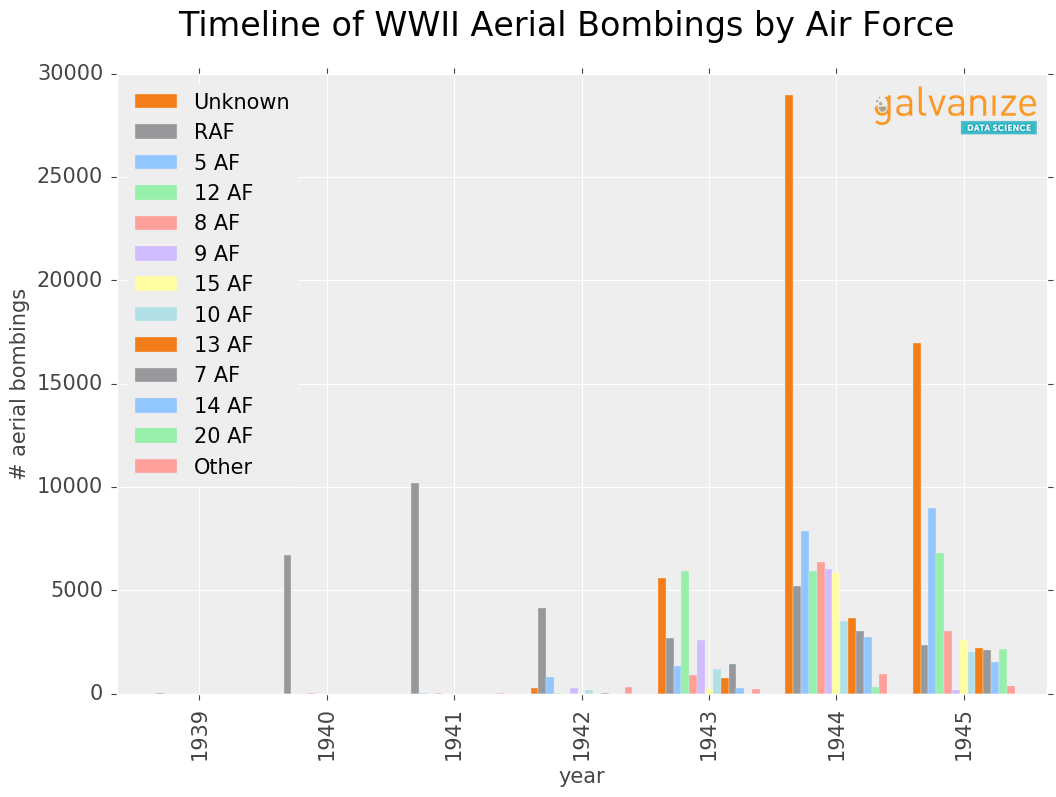

In [15]:
fig, ax = plt.subplots(1, 1)
naf_counts = df.groupby(['year', 'NAF']).apply(len) \
                    .unstack('NAF').fillna(0)
naf_counts.columns.name = ''
naf_counts[order].plot(kind='bar', ax=ax, width=0.8)
ax.set_ylabel('# aerial bombings')
ax.set_xlabel('year')
fig.suptitle("Timeline of WWII Aerial Bombings by Air Force")
watermark_fig(fig, 855, 640)

### COUNTRY_FLYING_MISSION

Too many are unkown.

In [16]:
df['COUNTRY_FLYING_MISSION'] = df['COUNTRY_FLYING_MISSION'].fillna('Unknown')
df['COUNTRY_FLYING_MISSION'].value_counts()

USA              94165
Unknown          51787
GREAT BRITAIN    31361
NEW ZEALAND      633  
AUSTRALIA        316  
SOUTH AFRICA     19   
Name: COUNTRY_FLYING_MISSION, dtype: int64

### TGT_COUNTRY

In [17]:
df['TGT_COUNTRY'] = df['TGT_COUNTRY'].fillna('Unknown')

In [18]:
counts = df['TGT_COUNTRY'].value_counts()
common_vals = counts[counts > 1000].index
common_vals

Index([u'GERMANY', u'ITALY', u'FRANCE', u'BURMA', u'PHILIPPINE ISLANDS',
       u'NEW GUINEA', u'AUSTRIA', u'CHINA', u'HOLLAND OR NETHERLANDS',
       u'BISMARK ARCHIPELAGO', u'CELEBES ISLANDS', u'JAPAN',
       u'UNKNOWN OR NOT INDICATED', u'BELGIUM', u'TUNISIA',
       u'FORMOSA AND RYUKYU ISLANDS', u'SOLOMON ISLANDS', u'BORNEO',
       u'CAROLINE ISLANDS'],
      dtype='object')

In [19]:
df.loc[~df['TGT_COUNTRY'].isin(common_vals), 'TGT_COUNTRY'] = 'Other'

In [20]:
order = df['TGT_COUNTRY'].value_counts().index

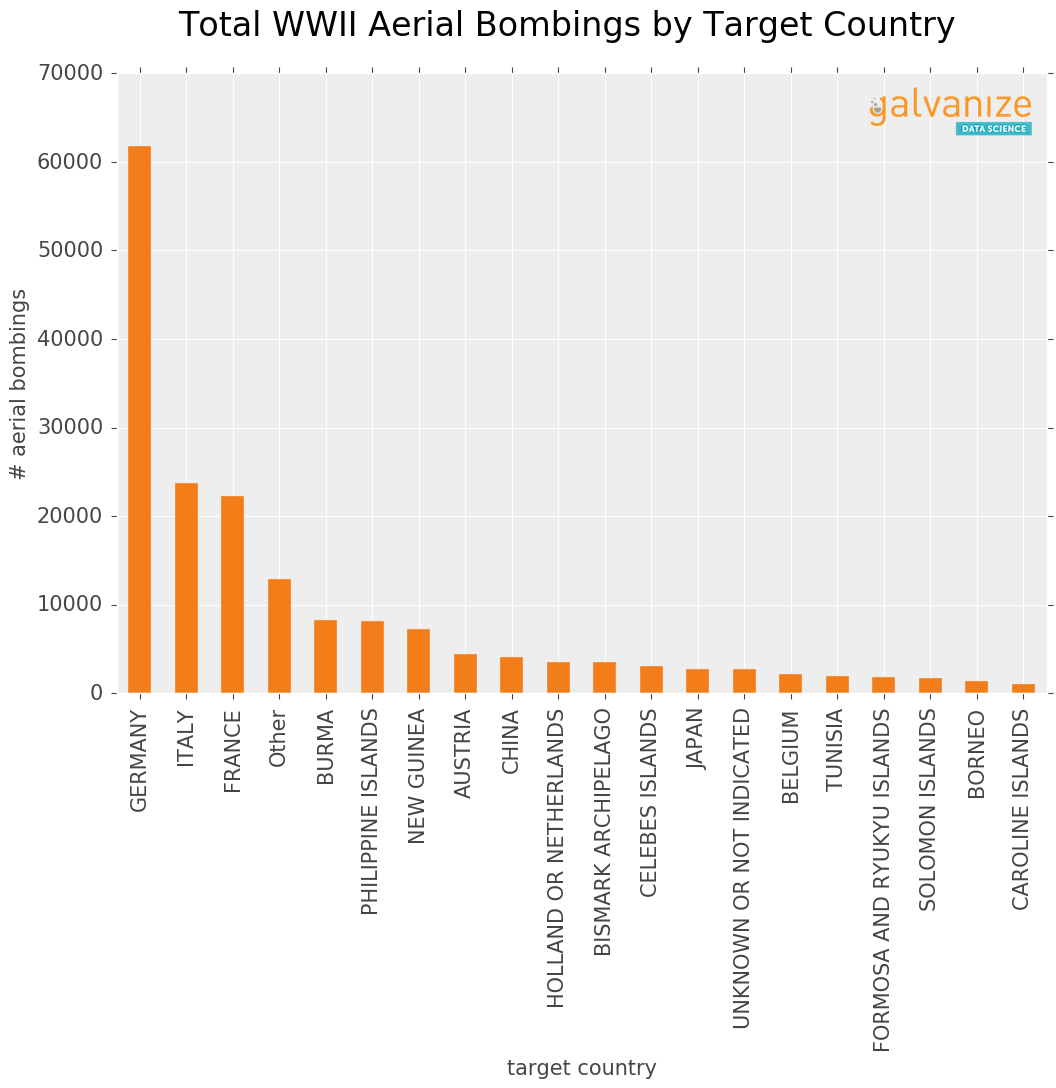

In [21]:
fig, ax = plt.subplots(1, 1)
df.groupby('TGT_COUNTRY').apply(len)[order].plot(kind='bar', ax=ax)
ax.set_ylabel('# aerial bombings')
ax.set_xlabel('target country')
fig.suptitle("Total WWII Aerial Bombings by Target Country")
watermark_fig(fig, 850, 930)

### UNIT_ID

The team who ran each mission.

In [22]:
df['UNIT_ID'] = df['UNIT_ID'].fillna('Unknown')
df['UNIT_ID'].value_counts().head()

Unknown    127368
88 FS      1008  
90 FS      756   
89 FS      751   
63 BS      703   
Name: UNIT_ID, dtype: int64

Too many unique things and too many unknowns.

In [23]:
df['UNIT_ID'].nunique()

779

### MDS

Again, more googling, it stands for "Model Design Series". See:
 - http://www.globalsecurity.org/military/systems/aircraft/mds.htm
 - https://en.wikipedia.org/wiki/United_States_military_aircraft_designation_systems
 
It's the type of aircraft that flew the mission.

In [24]:
df['MDS'] = df['MDS'].fillna('Unknown')
counts = df['MDS'].value_counts()
counts.head(20)

B24     33837
B17     31450
B25     17359
A20     12561
B26     11980
GB17    9124 
HVY     6298 
WELL    6097 
A26     4736 
P47     4660 
LGT     3673 
P51     3623 
HAMP    3551 
WHIT    3173 
GB24    3110 
BLEN    3029 
P38     3002 
P40     2891 
B29     2518 
MED     2378 
Name: MDS, dtype: int64

In [25]:
df['MDS'].nunique()

85

In [26]:
cols = counts[counts > 1000].index

In [27]:
df.loc[~df['MDS'].isin(cols), 'MDS'] = 'Other'

In [28]:
df.groupby('MDS').apply(len)

MDS
A20      12561
A26      4736 
A36      1384 
B17      31450
B24      33837
B25      17359
B26      11980
B29      2518 
BLEN     3029 
GB17     9124 
GB24     3110 
HAMP     3551 
HVY      6298 
LGT      3673 
MED      2378 
OB24     1067 
Other    6780 
P38      3002 
P40      2891 
P47      4660 
P51      3623 
WELL     6097 
WHIT     3173 
dtype: int64

In [29]:
counts = df['MDS'].value_counts()
cols = counts[counts > 1000].index

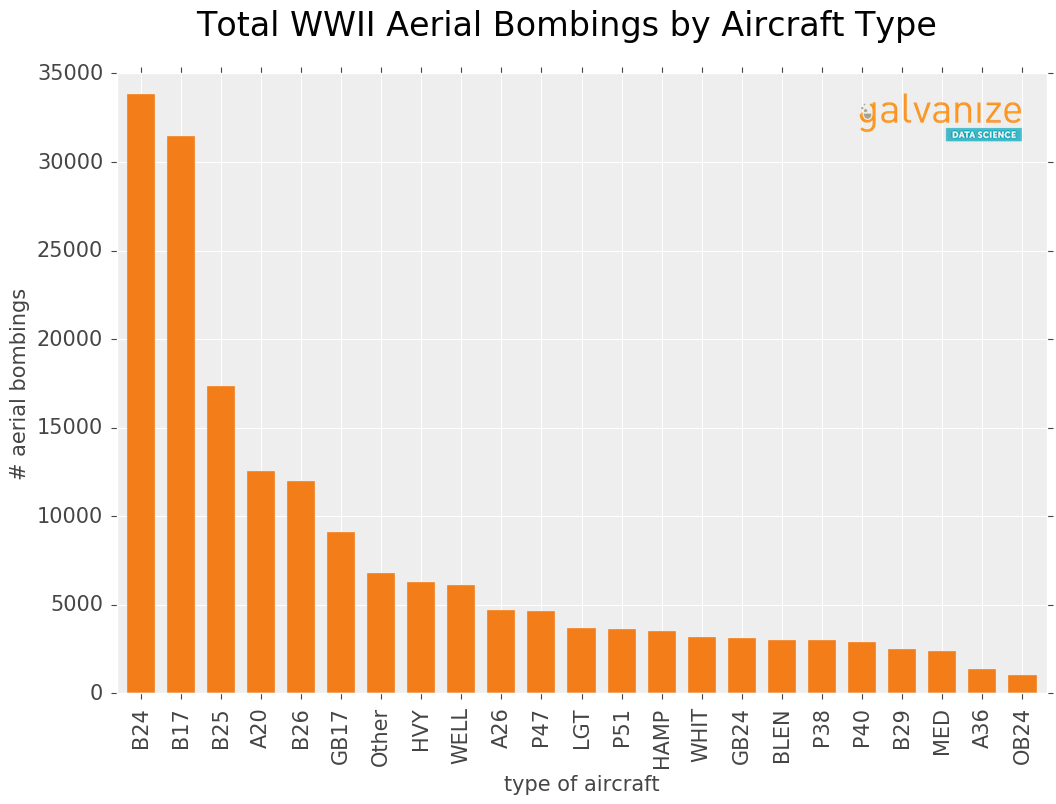

In [30]:
fig, ax = plt.subplots(1, 1)
df.groupby('MDS').apply(len)[cols].plot(kind='bar', ax=ax, width=0.7)
ax.set_ylabel('# aerial bombings')
ax.set_xlabel('type of aircraft')
fig.suptitle("Total WWII Aerial Bombings by Aircraft Type")
watermark_fig(fig, 840, 640)

### AIRCRAFT_NAME

This seems the same as MDS... uh... well, let's just look at it too.

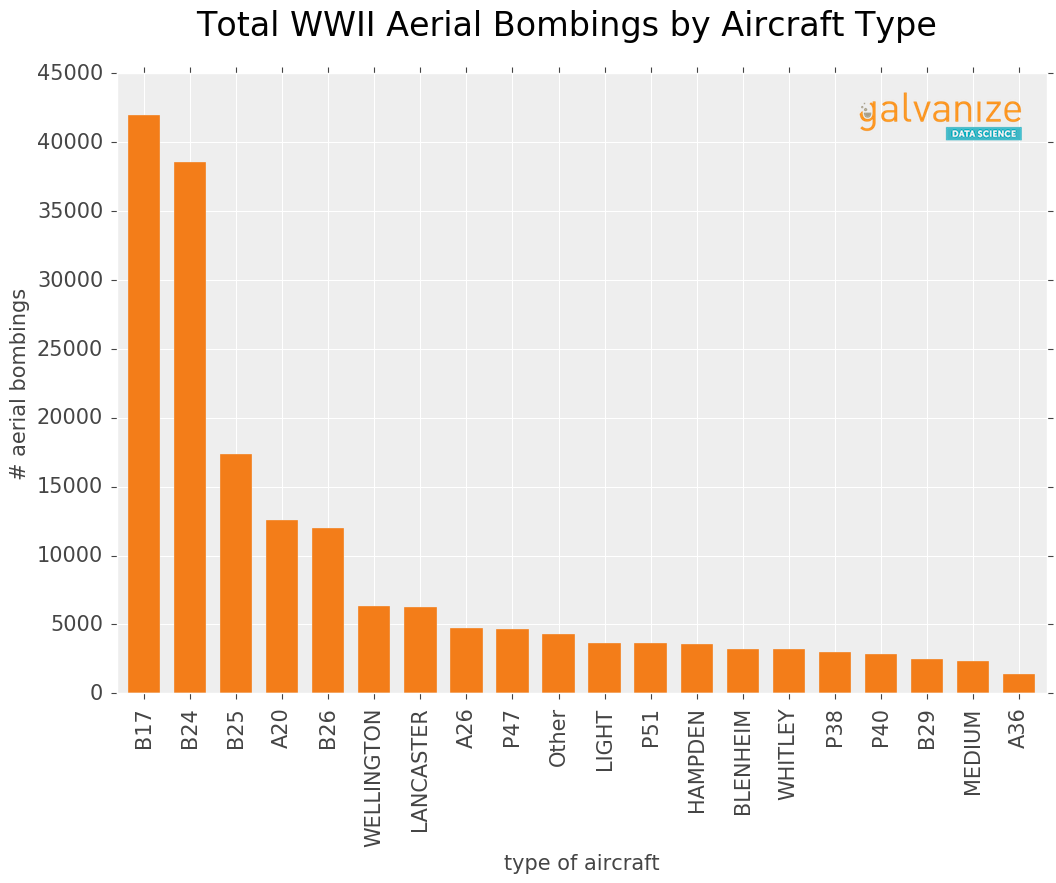

In [31]:
df['AIRCRAFT_NAME'] = df['AIRCRAFT_NAME'].fillna('Unknown')
counts = df['AIRCRAFT_NAME'].value_counts()
cols = counts[counts > 1000].index
df.loc[~df['AIRCRAFT_NAME'].isin(cols), 'AIRCRAFT_NAME'] = 'Other'
counts = df['AIRCRAFT_NAME'].value_counts()
cols = counts[counts > 1000].index

fig, ax = plt.subplots(1, 1)
df.groupby('AIRCRAFT_NAME').apply(len)[cols].plot(kind='bar', ax=ax, width=0.7)
ax.set_ylabel('# aerial bombings')
ax.set_xlabel('type of aircraft')
fig.suptitle("Total WWII Aerial Bombings by Aircraft Type")
watermark_fig(fig, 840, 720)

This seems basically the same... with minor details which I don't see as important. It does have less "other", so that's cool.

### MSN_TYPE

What is it?

In [32]:
df['MSN_TYPE'].value_counts()

1.0     27709
10.0    14885
12.0    2255 
6.0     1083 
99.0    391  
5.0     216  
17.0    206  
3.0     194  
2.0     102  
8.0     41   
11.0    30   
7.0     18   
4.0     12   
30.0    7    
18.0    6    
13.0    6    
15.0    5    
9.0     4    
19.0    2    
55.0    2    
40.0    2    
31.0    2    
95.0    2    
20.0    1    
16.0    1    
41.0    1    
32.0    1    
24.0    1    
Name: MSN_TYPE, dtype: int64

### TGT_PRIORITY and TGT_PRIORITY_EXPLANATION

In [33]:
df['TGT_PRIORITY'].value_counts()

1       104219
2       13943 
3       10934 
4       2521  
9       2099  
0       442   
P       398   
5       31    
O       28    
A       24    
6       20    
7       19    
SAAF    15    
8       14    
RNAS    9     
Name: TGT_PRIORITY, dtype: int64

In [34]:
df['TGT_PRIORITY_EXPLANATION'].value_counts()

PRIMARY TARGET           64647
SECONDARY TARGET         11589
TARGET OF OPPORTUNITY    9504 
TARGET OF LAST RESORT    2192 
Name: TGT_PRIORITY_EXPLANATION, dtype: int64

## AC_ATTACKING

What is it?

In [35]:
df['AC_ATTACKING'].value_counts()

1.0      26292
12.0     11989
4.0      8498 
6.0      8431 
2.0      7081 
11.0     6345 
3.0      5616 
9.0      4466 
8.0      4430 
10.0     4215 
5.0      4112 
13.0     4029 
7.0      3145 
18.0     2183 
24.0     1545 
16.0     1430 
14.0     1340 
17.0     1301 
15.0     1162 
27.0     1079 
20.0     1061 
23.0     1041 
26.0     1026 
28.0     982  
21.0     970  
19.0     969  
22.0     931  
36.0     810  
25.0     800  
35.0     710  
        ...   
81.0     17   
71.0     17   
93.0     16   
78.0     16   
90.0     15   
76.0     14   
94.0     13   
88.0     13   
86.0     13   
87.0     13   
82.0     13   
84.0     12   
74.0     12   
95.0     12   
69.0     11   
89.0     7    
111.0    2    
152.0    2    
221.0    2    
136.0    2    
313.0    1    
193.0    1    
118.0    1    
224.0    1    
119.0    1    
112.0    1    
134.0    1    
332.0    1    
139.0    1    
109.0    1    
Name: AC_ATTACKING, dtype: int64

### NUMBER_OF_HE, TYPE_OF_HE, LBS_HE, and TONS_OF_HE

_HE_ means "high-explosive": https://en.wikipedia.org/wiki/Explosive_material#High_explosives

E.g. https://en.wikipedia.org/wiki/SC250_bomb

In [36]:
weapons = pd.read_csv('datamil-world-war-ii-thor-data/THOR_WWII_WEAPON_GLOSS.csv')

In [37]:
weapons.head()

,RN,COUNTRY,WEAPON_NAME,WEAPON_TYPE,WEAPON_CLASS,NUMBER_OF_BOMBLETS,ALT_WEAPON_NAME,WEAPON_DESCRIPTION
0,1,USA,10 lb Incendiary,NaN,IC,NaN,AN-M67 or AN-M69,10 lb Incendiary that used White Phosphorous or other incendiary fuel
1,2,USA,100 lb Incendiary,NaN,IC,NaN,M47A2,100 lb M47A2 Incendiary usually loaded with gelled gassoline (Napalm)
2,3,USA,100 lb WP (White Phosphrous),NaN,IC,NaN,M47A2,100 lb M47A2 Smoke bomb
3,4,USA,1000 lb aux fuel tank Incendiary,NaN,IC,NaN,NaN,1000 lb Auxiliary fuel tank. When used as incendiaries they were usually filled with napalm
4,5,USA,136 lb (38x4 Clusters) I-M6,I-M6,IC,NaN,M6,M6 Cluster containing 38 AN-M50 incendiary bombs. They usually carried 128 AN-M50's.


In [38]:
weapons['WEAPON_CLASS'].value_counts()

HE      26
IC      21
Frag    12
Name: WEAPON_CLASS, dtype: int64

In [39]:
weapons[weapons['WEAPON_CLASS'] == 'HE'].head()

,RN,COUNTRY,WEAPON_NAME,WEAPON_TYPE,WEAPON_CLASS,NUMBER_OF_BOMBLETS,ALT_WEAPON_NAME,WEAPON_DESCRIPTION
18,19,USA,100 lb GP (GP-M30),GP-M30,HE,NaN,AN-M30,100 lb General Purpose
19,20,USA,1000 lb AP (AP-Mk 33),AP-Mk 33,HE,NaN,AN-Mk33 or M52,1000 lb Armor Piercing
20,21,USA,1000 lb GP (GP-M44/M65),GP-M44/M65,HE,NaN,AN-M44 or AN-M65,1000 lb General Purpose
21,22,USA,1000 lb mines,NaN,HE,NaN,NaN,Mk-26 or MK-13???
22,23,USA,1000 lb SAP(SA-M59),SA-M59,HE,NaN,AN-M59,1000 lb Semi Armor Piercing


In [40]:
df['NUMBER_OF_HE'].describe()

count    34738.000000
mean     32.770292   
std      75.232185   
min      0.000000    
25%      8.000000    
50%      16.000000   
75%      36.000000   
max      2840.000000 
Name: NUMBER_OF_HE, dtype: float64

I think that max value has gotta be an outlier.

In [41]:
s = df['NUMBER_OF_HE']
mask = (~s.isnull()) & (np.abs(s - s.mean()) < 3. * s.std())

In [42]:
df[mask]['NUMBER_OF_HE'].describe()

count    34312.000000
mean     27.050672   
std      31.703718   
min      0.000000    
25%      8.000000    
50%      16.000000   
75%      36.000000   
max      256.000000  
Name: NUMBER_OF_HE, dtype: float64

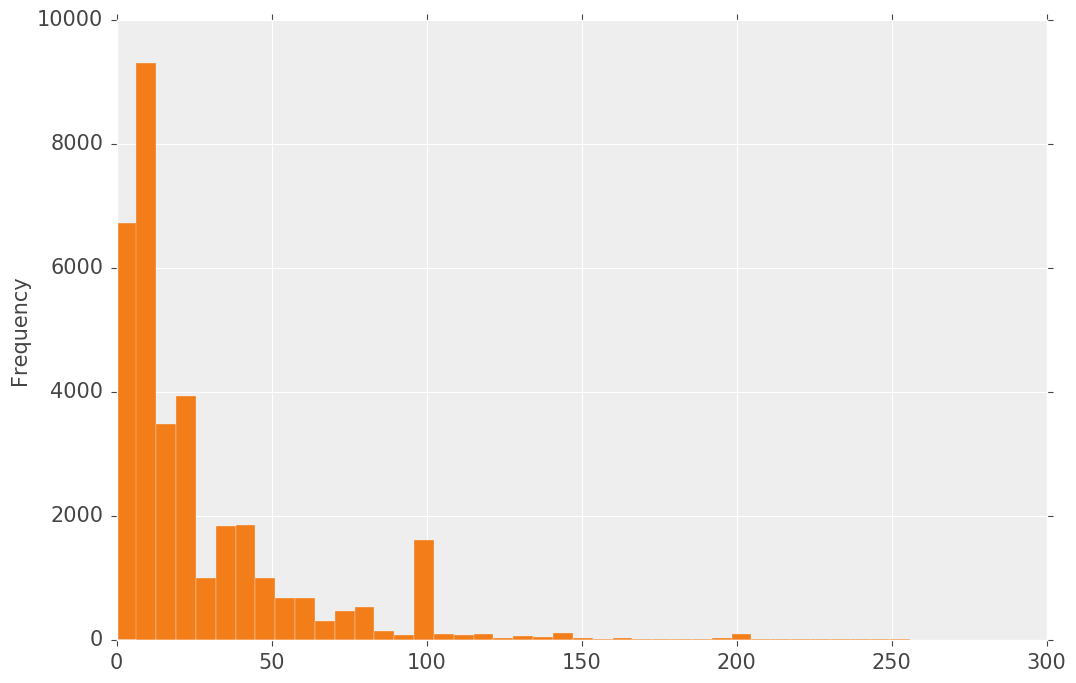

In [43]:
df[mask]['NUMBER_OF_HE'].plot(kind='hist', bins=40)

In [44]:
df['TYPE_OF_HE'] = df['TYPE_OF_HE'].fillna('Unknown')
counts = df['TYPE_OF_HE'].value_counts()
keep = counts[counts > 100].index
df.loc[~df['TYPE_OF_HE'].isin(keep), 'TYPE_OF_HE'] = 'Other'

In [45]:
counts = df['TYPE_OF_HE'].value_counts()
counts

Unknown                        136335
500 LB GP (GP-M43/M64)         18318 
250 LB GP (GP-M57)             8372  
1000 LB GP (GP-M44/M65)        6956  
100 LB GP (GP-M30)             5853  
2000 LB GP (GP-M34/M66)        638   
325 LB DC (DB-MK 17/47)        638   
1000 LB SAP(SA-M59)            310   
FLARES PYROTECHNICS(PY-M26)    307   
Other                          256   
300 LB GP (GP-31)              196   
TORPEDOES MISC                 102   
Name: TYPE_OF_HE, dtype: int64

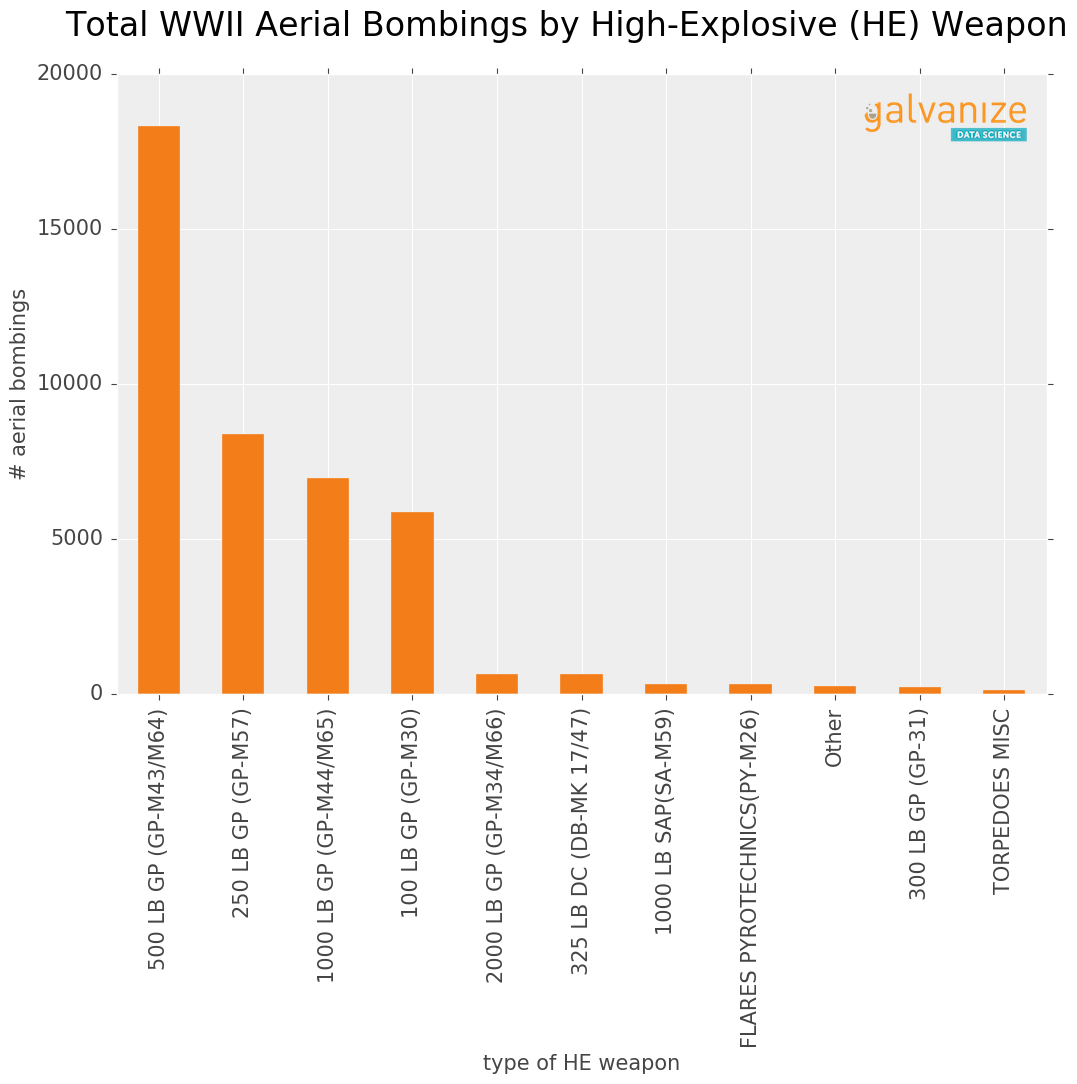

In [46]:
fig, ax = plt.subplots(1, 1)
df.groupby('TYPE_OF_HE').apply(len)[counts.index[1:]].plot(kind='bar', ax=ax)
ax.set_ylabel('# aerial bombings')
ax.set_xlabel('type of HE weapon')
fig.suptitle("Total WWII Aerial Bombings by High-Explosive (HE) Weapon")
watermark_fig(fig, 845, 920)

In [47]:
df['LBS_HE'].isnull().sum()

176260

In [48]:
df['TONS_OF_HE'].isnull().sum()

32080

TONS_OF_HE has way less NaNs. Which is weird. But whatever. I wonder if they are _different_ NaNs?

In [49]:
diff = set(df[df['TONS_OF_HE'].isnull()].index) - set(df[df['LBS_HE'].isnull()].index)
len(diff)

244

So there are 244 missions where the LBS_HE is filled in and the TONS_OF_HE isn't.

In [50]:
df.loc[list(diff), 'TONS_OF_HE'] = df.loc[list(diff), 'LBS_HE'] * 0.0005

In [51]:
df['TONS_OF_HE'].isnull().sum()

31836

In [52]:
diff = set(df[df['TONS_OF_HE'].isnull()].index) - set(df[df['LBS_HE'].isnull()].index)
len(diff)

0

In [53]:
df['TONS_OF_HE'].describe()

count    146445.00000
mean     23.80293    
std      85.46516    
min      0.00000     
25%      2.00000     
50%      9.00000     
75%      30.00000    
max      20000.00000 
Name: TONS_OF_HE, dtype: float64

Again, seems like there are outliers...

In [54]:
s = df['TONS_OF_HE']
mask = (~s.isnull()) & (np.abs(s - s.mean()) < 3. * s.std())

In [55]:
df[mask]['TONS_OF_HE'].describe()

count    145378.000000
mean     19.925505    
std      26.538673    
min      0.000000     
25%      2.000000     
50%      9.000000     
75%      30.000000    
max      280.000000   
Name: TONS_OF_HE, dtype: float64

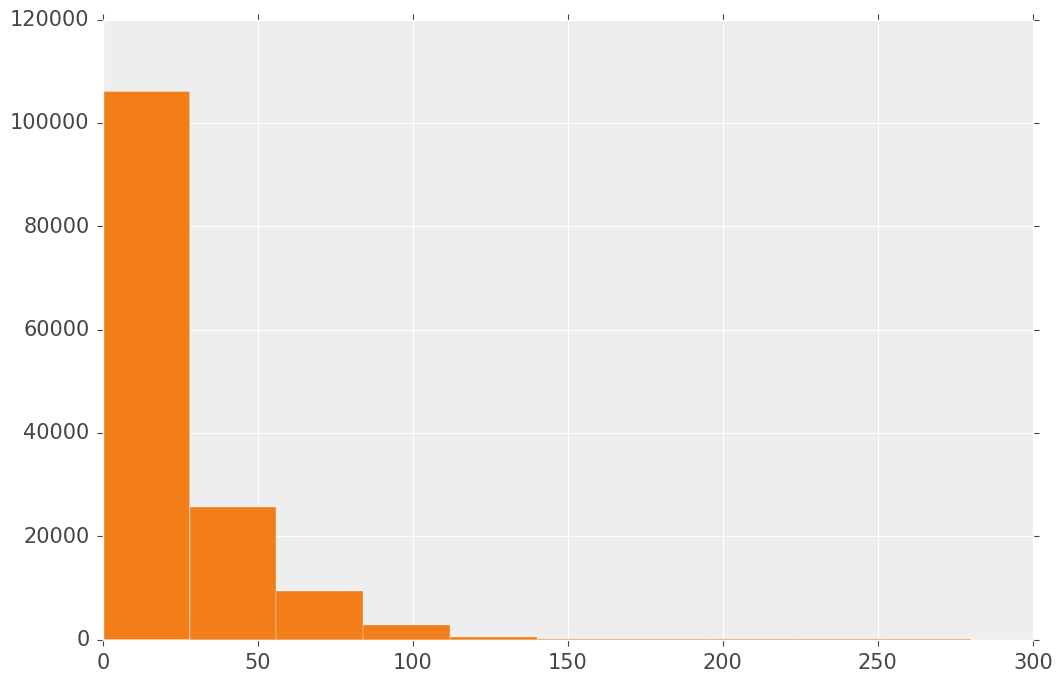

In [56]:
df[mask]['TONS_OF_HE'].hist()

### NUMBER_OF_IC, TYPE_OF_IC, LBS_IC, and TONS_OF_IC

_IC_ means "incendiary device": https://en.wikipedia.org/wiki/Incendiary_device#Development_and_use_in_World_War_II

In [57]:
weapons[weapons['WEAPON_CLASS'] == 'IC'].head()

,RN,COUNTRY,WEAPON_NAME,WEAPON_TYPE,WEAPON_CLASS,NUMBER_OF_BOMBLETS,ALT_WEAPON_NAME,WEAPON_DESCRIPTION
0,1,USA,10 lb Incendiary,NaN,IC,NaN,AN-M67 or AN-M69,10 lb Incendiary that used White Phosphorous or other incendiary fuel
1,2,USA,100 lb Incendiary,NaN,IC,NaN,M47A2,100 lb M47A2 Incendiary usually loaded with gelled gassoline (Napalm)
2,3,USA,100 lb WP (White Phosphrous),NaN,IC,NaN,M47A2,100 lb M47A2 Smoke bomb
3,4,USA,1000 lb aux fuel tank Incendiary,NaN,IC,NaN,NaN,1000 lb Auxiliary fuel tank. When used as incendiaries they were usually filled with napalm
4,5,USA,136 lb (38x4 Clusters) I-M6,I-M6,IC,NaN,M6,M6 Cluster containing 38 AN-M50 incendiary bombs. They usually carried 128 AN-M50's.


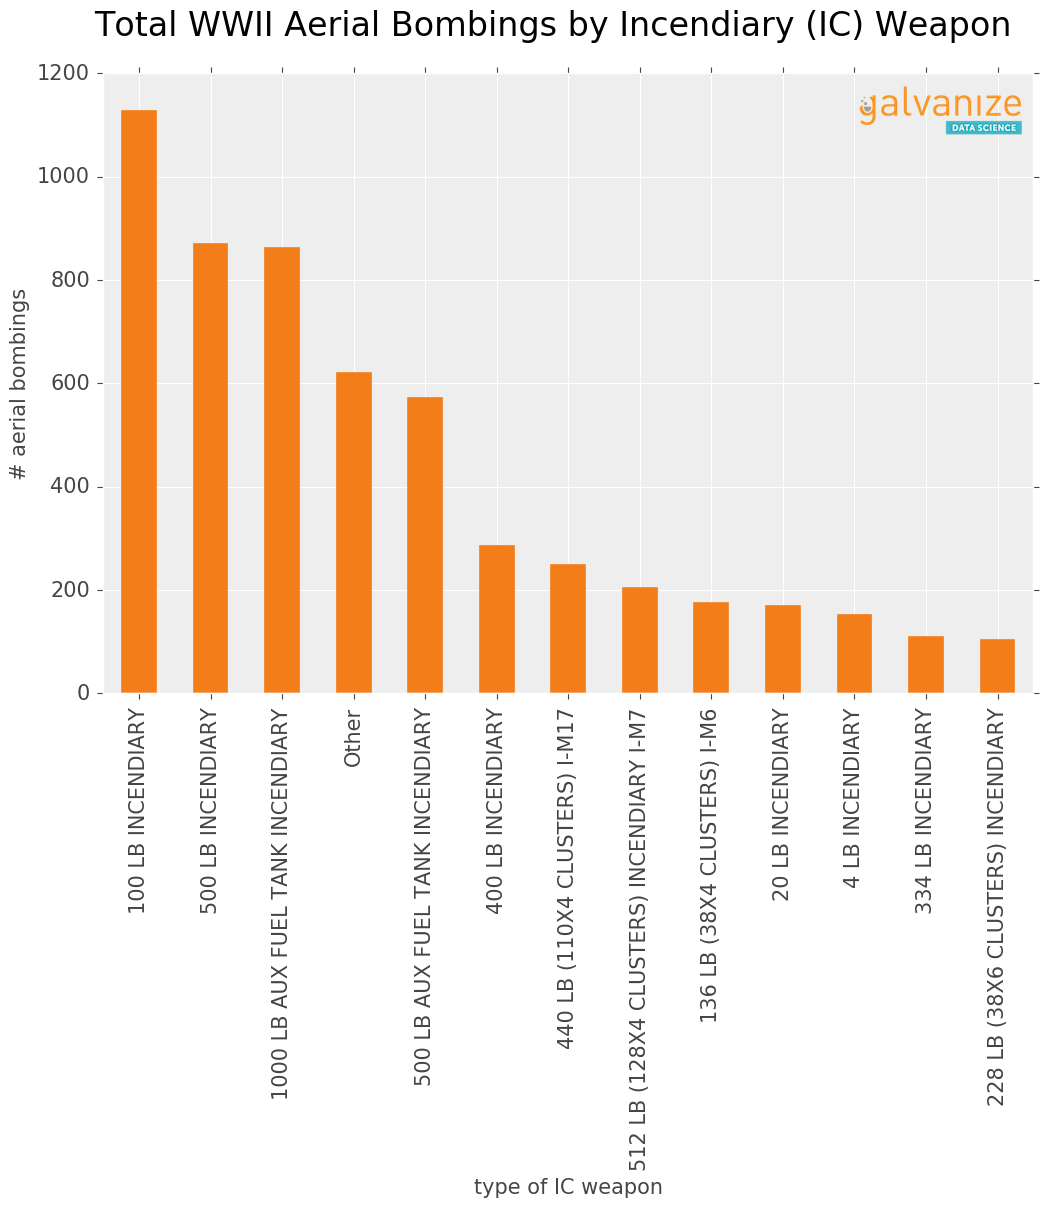

In [58]:
df['TYPE_OF_IC'] = df['TYPE_OF_IC'].fillna('Unknown')
counts = df['TYPE_OF_IC'].value_counts()
keep = counts[counts > 100].index
df.loc[~df['TYPE_OF_IC'].isin(keep), 'TYPE_OF_IC'] = 'Other'

counts = df['TYPE_OF_IC'].value_counts()

fig, ax = plt.subplots(1, 1)
df.groupby('TYPE_OF_IC').apply(len)[counts.index[1:]].plot(kind='bar', ax=ax)
ax.set_ylabel('# aerial bombings')
ax.set_xlabel('type of IC weapon')
fig.suptitle("Total WWII Aerial Bombings by Incendiary (IC) Weapon")
watermark_fig(fig, 840, 1050)

### NUMBER_OF_FRAG, TYPE_OF_FRAG, LBS_FRAG, and TONS_OF_FRAG

_FRAG_ means "Fragmentation weapon": https://en.wikipedia.org/wiki/Fragmentation_(weaponry)

E.g.
 - https://en.wikipedia.org/wiki/M29_cluster_bomb
 - https://en.wikipedia.org/wiki/Butterfly_Bomb
 - https://en.wikipedia.org/wiki/Mk_2_grenade

In [59]:
weapons[weapons['WEAPON_CLASS'] == 'Frag'].head()

,RN,COUNTRY,WEAPON_NAME,WEAPON_TYPE,WEAPON_CLASS,NUMBER_OF_BOMBLETS,ALT_WEAPON_NAME,WEAPON_DESCRIPTION
38,39,USA,120 lb Frag (6x20 Clusters),NaN,Frag,NaN,NaN,Cluster bomb containing 6 M41 fragmentation bombs
39,40,USA,20 lb Frag,M41,Frag,NaN,M41,US M41 20 lb Fragmentation bomb
40,41,USA,23 lb Frag,NaN,Frag,NaN,AN-M40 or AN-M72,For AN-M40 see 23 lb Parafrag
41,42,USA,23 LB Frag Clusters (6 x23 per cluster),NaN,Frag,NaN,NaN,Cluster bomb containing 6 AN-M40 or AN-M72 fragmentation bombs
42,43,USA,23 LB Parafrag,An-M40,Frag,NaN,AN-M40,23 lb Parachute Fragmentation bomb


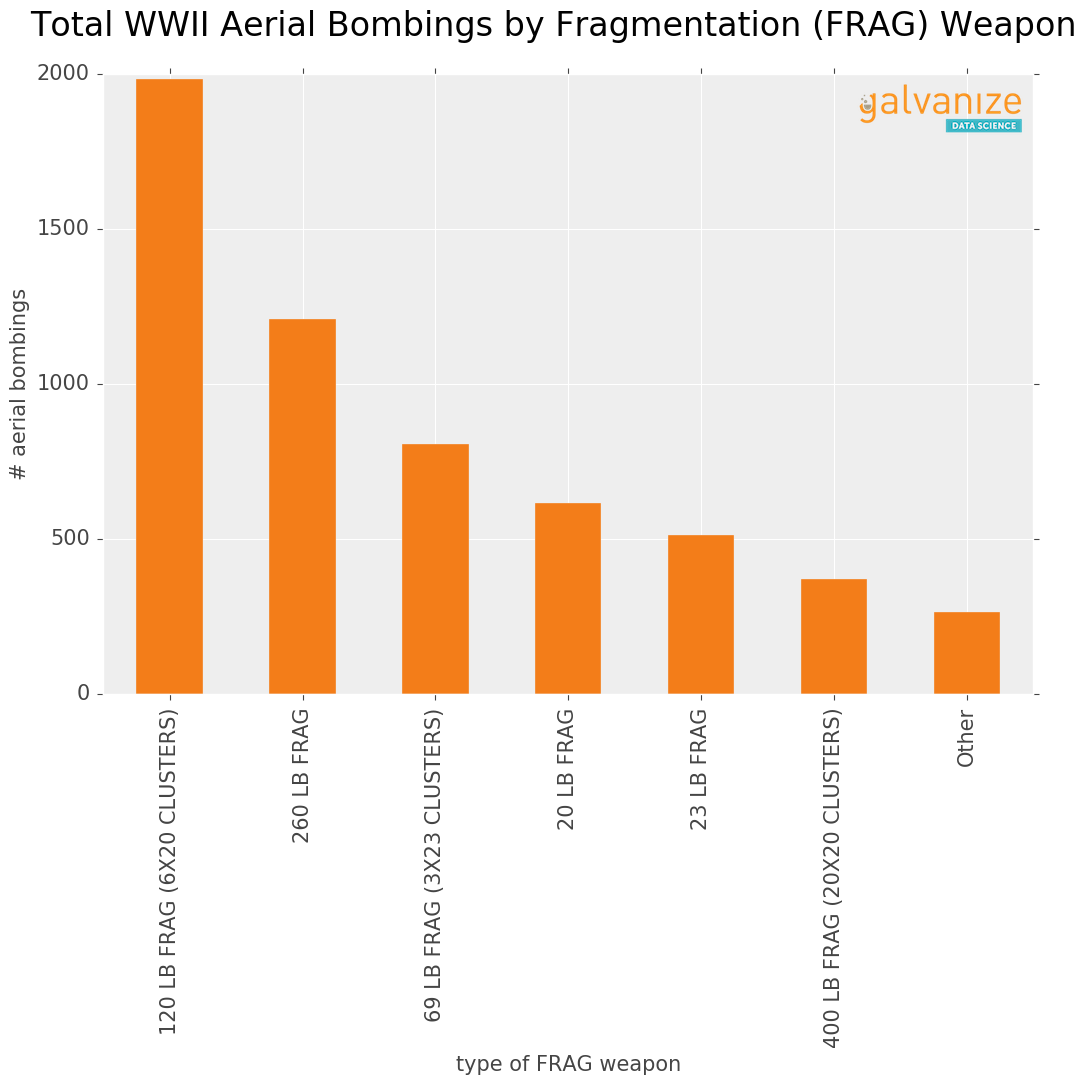

In [60]:
df['TYPE_OF_FRAG'] = df['TYPE_OF_FRAG'].fillna('Unknown')
counts = df['TYPE_OF_FRAG'].value_counts()
keep = counts[counts > 100].index
df.loc[~df['TYPE_OF_FRAG'].isin(keep), 'TYPE_OF_FRAG'] = 'Other'

counts = df['TYPE_OF_FRAG'].value_counts()

fig, ax = plt.subplots(1, 1)
df.groupby('TYPE_OF_FRAG').apply(len)[counts.index[1:]].plot(kind='bar', ax=ax)
ax.set_ylabel('# aerial bombings')
ax.set_xlabel('type of FRAG weapon')
fig.suptitle("Total WWII Aerial Bombings by Fragmentation (FRAG) Weapon")
watermark_fig(fig, 840, 930)

### TOTAL_LBS and TOTAL_TONS

In [61]:
df[['TOTAL_LBS', 'TOTAL_TONS']].describe()

,TOTAL_LBS,TOTAL_TONS
count,2.118000e+03,166509.000000
mean,1.239289e+04,25.635274
std,2.064637e+05,84.848713
min,0.000000e+00,0.000000
25%,2.100000e+03,2.000000
50%,5.200000e+03,9.000000
75%,1.080000e+04,31.000000
max,9.500000e+06,20000.000000


So, there are more TOTAL_TONS filled in. That's cool.

But again, this is whack because I don't think a plane can carry 20,000 tons! Can it? I don't think so. Quora (which is alwasy right :P) says that the largest cargo plane can only carry 250,000 Kg (275 tons). Ref: https://www.quora.com/How-much-weight-can-planes-carry


In [62]:
df['TOTAL_TONS'].isnull().mean()

0.06603059215508103

In [63]:
s = df['TOTAL_TONS']
mask = (~s.isnull()) & (np.abs(s - s.mean()) < 3. * s.std())

In [64]:
df[mask]['TOTAL_TONS'].isnull().mean()

0.0

In [65]:
1 - mask.mean()

0.07441623055737856

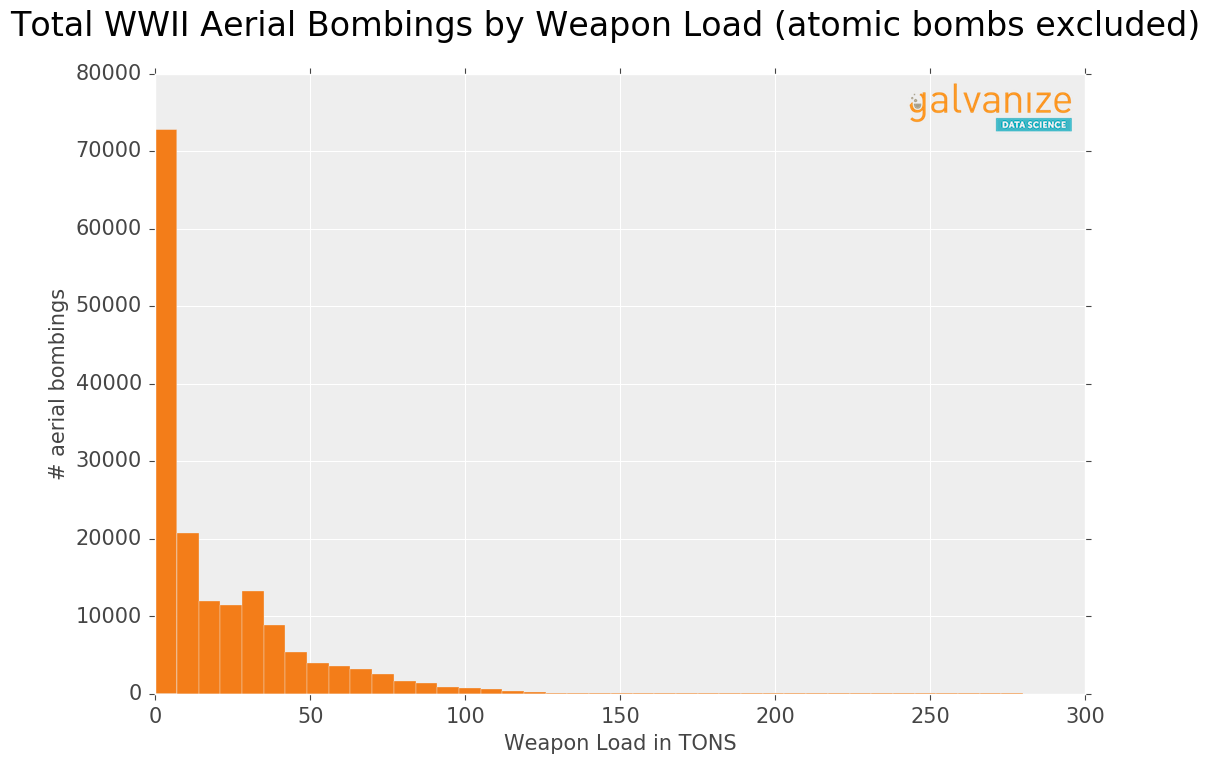

In [66]:
fig, ax = plt.subplots(1, 1)
df[mask]['TOTAL_TONS'].hist(bins=40, ax=ax)
ax.set_ylabel('# aerial bombings')
ax.set_xlabel('Weapon Load in TONS')
fig.suptitle("Total WWII Aerial Bombings by Weapon Load (atomic bombs excluded)")
watermark_fig(fig, 890, 610)

In [67]:
df['TGT_COUNTRY'].value_counts()

GERMANY                       61744
ITALY                         23689
FRANCE                        22226
Other                         12852
BURMA                         8259 
PHILIPPINE ISLANDS            8180 
NEW GUINEA                    7213 
AUSTRIA                       4380 
CHINA                         4060 
HOLLAND OR NETHERLANDS        3560 
BISMARK ARCHIPELAGO           3484 
CELEBES ISLANDS               3094 
JAPAN                         2748 
UNKNOWN OR NOT INDICATED      2742 
BELGIUM                       2149 
TUNISIA                       1978 
FORMOSA AND RYUKYU ISLANDS    1803 
SOLOMON ISLANDS               1689 
BORNEO                        1399 
CAROLINE ISLANDS              1032 
Name: TGT_COUNTRY, dtype: int64

In [68]:
df['TGT_COUNTRY'].isnull().mean()

0.0

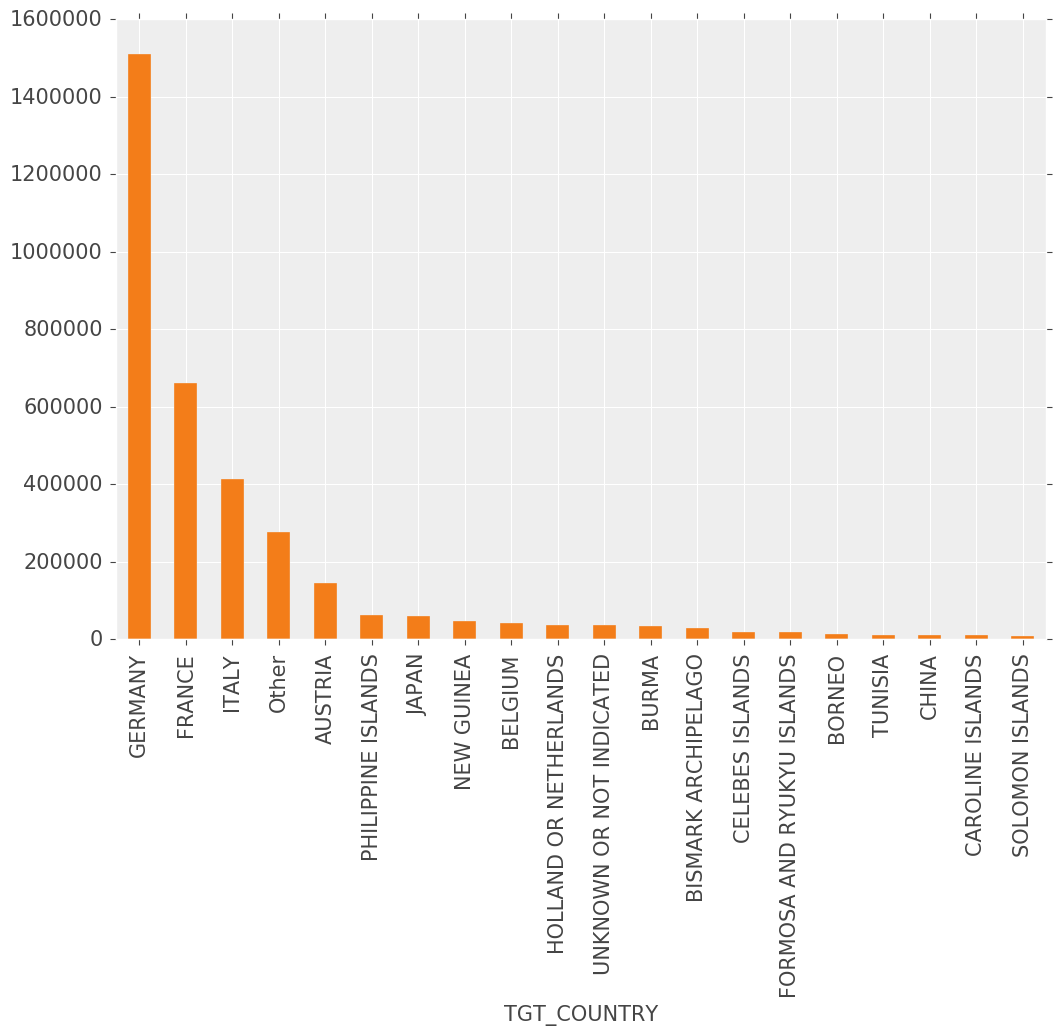

In [69]:
df[mask].groupby('TGT_COUNTRY')['TOTAL_TONS'].apply(np.sum).sort_values(ascending=False).plot(kind='bar')

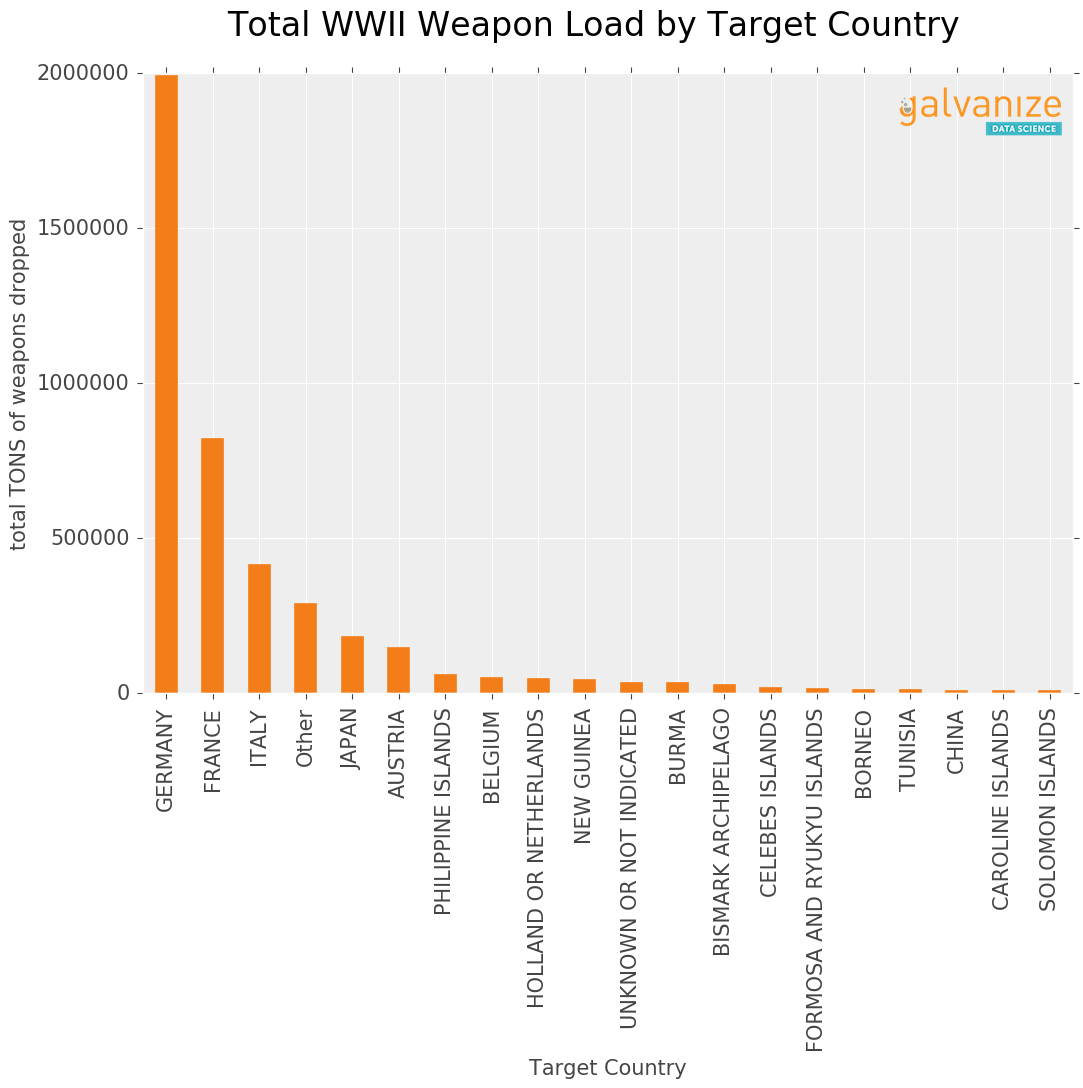

In [70]:
fig, ax = plt.subplots(1, 1)
groups = df.groupby('TGT_COUNTRY')['TOTAL_TONS'].apply(np.sum).sort_values(ascending=False)
groups.plot(kind='bar', ax=ax)
ax.set_ylabel('total TONS of weapons dropped')
ax.set_xlabel('Target Country')
fig.suptitle("Total WWII Weapon Load by Target Country")
watermark_fig(fig, 880, 930)

### AC_LOST, AC_DAMAGED, AC_AIRBORNE, AC_DROPPING

I think AC stands for "attack aircraft". https://en.wikipedia.org/wiki/Attack_aircraft

These fields don't seem very interesting.

In [71]:
df['AC_LOST'].value_counts()

1.0     97
2.0     31
3.0     10
5.0     7 
4.0     7 
0.0     2 
80.0    1 
12.0    1 
6.0     1 
Name: AC_LOST, dtype: int64

In [72]:
df['AC_DAMAGED'].value_counts()

1.0    18
2.0    9 
3.0    5 
4.0    3 
6.0    1 
9.0    1 
0.0    1 
Name: AC_DAMAGED, dtype: int64

In [73]:
df['AC_AIRBORNE'].value_counts()

1.0      20110
12.0     9488 
11.0     4903 
13.0     3729 
2.0      3689 
10.0     3088 
6.0      2550 
3.0      2206 
9.0      2128 
18.0     2046 
4.0      1704 
24.0     1490 
8.0      1440 
5.0      1343 
7.0      1202 
17.0     1197 
27.0     1068 
26.0     1020 
14.0     1016 
20.0     1001 
28.0     981  
16.0     966  
23.0     964  
21.0     919  
19.0     918  
22.0     864  
36.0     823  
15.0     807  
25.0     786  
35.0     711  
        ...   
89.0     6    
5.5      6    
17.5     5    
11.5     5    
10.5     5    
13.5     3    
20.5     2    
136.0    2    
6.5      2    
111.0    2    
221.0    2    
27.5     2    
118.0    1    
28.5     1    
15.5     1    
3.5      1    
18.5     1    
23.5     1    
109.0    1    
313.0    1    
14.5     1    
9.5      1    
41.5     1    
22.5     1    
224.0    1    
141.0    1    
7.5      1    
4.5      1    
332.0    1    
0.5      1    
Name: AC_AIRBORNE, dtype: int64

In [74]:
df['AC_DROPPING'].value_counts()

1.0      20170
12.0     9360 
11.0     4865 
2.0      3750 
13.0     3702 
10.0     3038 
6.0      2444 
3.0      2301 
9.0      2082 
18.0     2036 
4.0      1672 
24.0     1461 
5.0      1353 
8.0      1325 
7.0      1191 
17.0     1184 
27.0     1068 
26.0     1014 
20.0     1006 
14.0     1005 
28.0     978  
23.0     956  
16.0     934  
21.0     922  
19.0     911  
22.0     876  
36.0     821  
15.0     782  
25.0     781  
35.0     715  
        ...   
93.0     15   
83.0     15   
71.0     15   
91.0     15   
0.0      15   
80.0     14   
86.0     13   
84.0     13   
78.0     13   
87.0     13   
74.0     13   
76.0     13   
88.0     13   
90.0     11   
94.0     11   
69.0     10   
82.0     10   
95.0     10   
89.0     6    
111.0    2    
221.0    2    
136.0    2    
224.0    1    
141.0    1    
155.0    1    
313.0    1    
100.0    1    
109.0    1    
332.0    1    
118.0    1    
Name: AC_DROPPING, dtype: int64

### TIME_OVER_TARGET

This doesn't seem interesting either.

In [75]:
df['TIME_OVER_TARGET'].value_counts()

2000.0      8
814         5
1620.0      5
1600.0      5
1815        5
1945        5
300         5
400         5
12:30:00    4
620         4
1130        4
1623        4
830         4
2338.0      4
1830        4
1800        4
13:40:00    4
2130.0      4
1821.0      4
245         4
730         4
1200        4
758.0       4
20          4
430         3
903.0       3
2255        3
2100.0      3
930.0       3
905.0       3
           ..
1444        1
6           1
2030        1
1328        1
955         1
1400        1
1405        1
1533        1
450         1
2350.0      1
2345.0      1
2342.0      1
2255.0      1
2143.0      1
2146.0      1
2158.0      1
2210.0      1
2225.0      1
2230.0      1
2245.0      1
2257.0      1
2339.0      1
2300.0      1
2305.0      1
2311.0      1
2316.0      1
2320.0      1
2322.0      1
2325.0      1
2014.0      1
Name: TIME_OVER_TARGET, dtype: int64

### BDA

"Bomb damage assessment" https://en.wikipedia.org/wiki/Bomb_damage_assessment

In [76]:
df[~df['BDA'].isnull()]['BDA'].head()

11862     EXCELLENT                        
11868     GOOD                             
112055    "3 DIRECT HITS, 8 WATERLINE HITS"
112056    RESULTS DOUBTFUL                 
112057    NOT STATED                       
Name: BDA, dtype: object

### Bombings by country over time